## Model function

線性回歸的數學模型

$$ f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.array([1.0, 2.0])
y = np.array([300.0, 500.0])
w = 200
b = 100

In [3]:
def model(x, w, b):
    return w * x + b

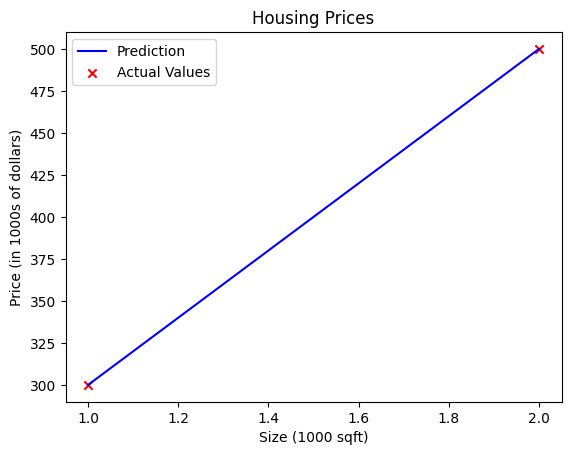

In [4]:
f = model(x, w, b)

plt.plot(x, f, c = "blue", label = "Prediction")
plt.scatter(x, y, marker = "x", c = "red", label = 'Actual Values')

plt.title("Housing Prices")
plt.ylabel('Price (in 1000s of dollars)')
plt.xlabel('Size (1000 sqft)')
plt.legend()
plt.show()

## Computing Cost

線性回歸的成本公式:
  $$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 \tag{1}$$ 
 
其中 
  $$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{2}$$
  
- $f_{w,b}(x^{(i)})$ 是使用 $w,b$ 預測第 $i$ 比資料的結果  
- $(f_{w,b}(x^{(i)}) -y^{(i)})^2$ 是和真實結果的方差   
- 基於計算方便使用 `2m` 計算 $J(w,b)$.

In [5]:
def computeCost(x, y, w, b):
    pred = model(x, w, b)
    cost = np.mean((pred - y) ** 2) / 2
    return cost

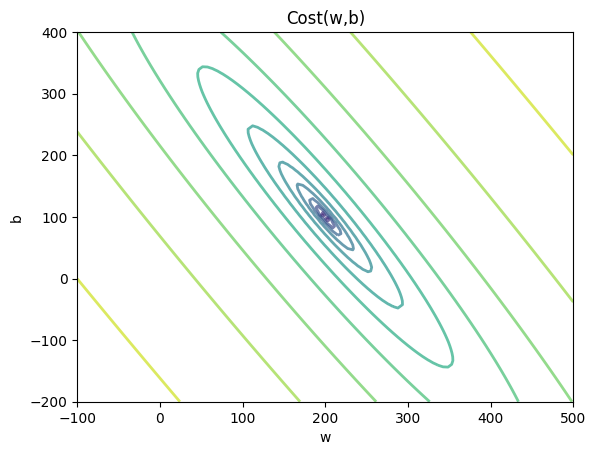

In [6]:
offset = 300
step = 100
rangeW = np.array([w - offset, w + offset])
rangeB = np.array([b - offset, b + offset])
spaceW  = np.linspace(*rangeW, step)
spaceB  = np.linspace(*rangeB, step)

ww, bb = np.meshgrid(spaceW, spaceB)
costMatrix = np.zeros_like(ww)
for i in range(ww.shape[0]):
    for j in range(ww.shape[1]):
        costMatrix[i, j] = computeCost(x, y, ww[i, j], bb[i, j])
        if costMatrix[i, j] == 0:
            costMatrix[i, j] = 1e-6

fig, ax = plt.subplots(1, 1)
ax.set_title('Cost(w,b)')
ax.set_xlabel('w', fontsize = 10)
ax.set_ylabel('b', fontsize = 10)
ax.set_xlim(rangeW) 
ax.set_ylim(rangeB)
ax.contour(ww, bb, np.log(costMatrix), levels = 12, linewidths = 2, alpha = 0.7)

## Gradient Descent

梯度下降法

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{3}  \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$
其中， $w$, $b$ 是同步更新的。
梯度計算方式是:
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{4}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{5}\\
\end{align}
$$

In [7]:
def computeGradient(x, y, w, b):
    pred = model(x, w, b)
    err = pred - y
    gradW = np.mean(err * x)
    gradB = np.mean(err)
    return gradW, gradB

Text(0, 0.5, 'b')

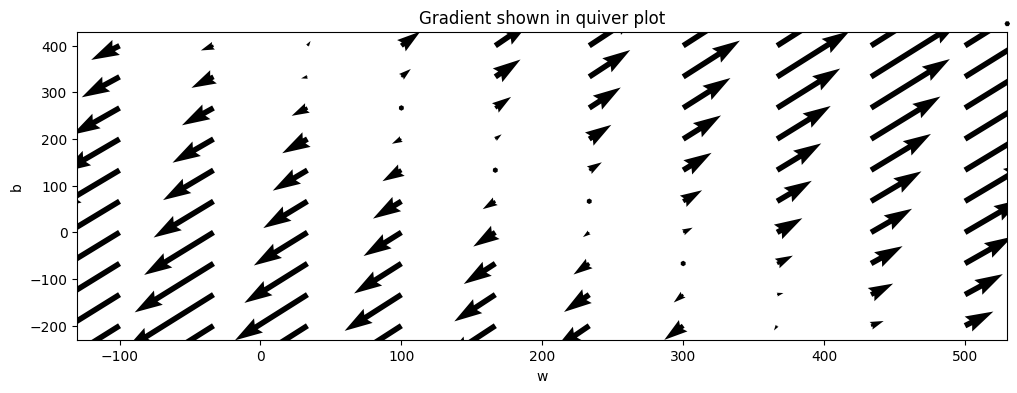

In [8]:
step = 10
spaceW  = np.linspace(*rangeW, step)
spaceB  = np.linspace(*rangeB, step)
ww, bb = np.meshgrid(spaceW, spaceB)

gradW = np.zeros_like(ww)
gradB = np.zeros_like(bb)
for i in range(ww.shape[0]):
    for j in range(ww.shape[1]):
        gradW[i, j], gradB[i, j] = computeGradient(x, y, ww[i, j], bb[i, j])

fig, ax = plt.subplots(1, 1, figsize = (12, 4))
ax.set_title('Gradient shown in quiver plot')
Q = ax.quiver(ww, bb, gradW, gradB, units = 'width')
ax.quiverkey(Q, 0.9, 0.9, 2, r'$2 \frac{m}{s}$', labelpos = 'E', coordinates = 'figure')
ax.set_xlabel("w")
ax.set_ylabel("b")

In [9]:
def gradientDescent(x, y, w, b, alpha, iterCount):
    costs = []
    for i in range(iterCount):
        gradW, gradB = computeGradient(x, y, w, b)
        w = w - alpha * gradW
        b = b - alpha * gradB
        cost = computeCost(x, y, w, b)
        costs.append(cost)
        if i % 100 == 0:
            print(f"iter: {i}, cost: {cost:0.2e}")
    return w, b, costs

In [10]:
w = 0
b = 0
iterCount = 1000
alpha = 0.01
w, b, costs = gradientDescent(x, y, w, b, alpha, iterCount)

iter: 0, cost: 7.93e+04
iter: 100, cost: 8.68e+01
iter: 200, cost: 1.10e+01
iter: 300, cost: 9.48e+00
iter: 400, cost: 8.19e+00
iter: 500, cost: 7.08e+00
iter: 600, cost: 6.12e+00
iter: 700, cost: 5.29e+00
iter: 800, cost: 4.57e+00
iter: 900, cost: 3.95e+00


Text(0.5, 0, 'iteration step')

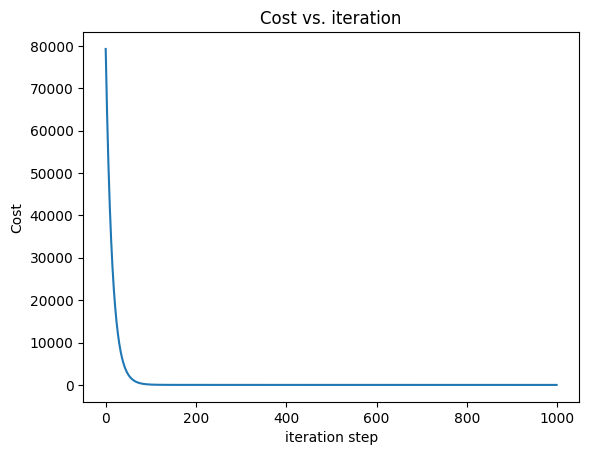

In [11]:
fig, ax = plt.subplots(1, 1)
ax.plot(range(iterCount) ,costs)
ax.set_title("Cost vs. iteration")
ax.set_ylabel('Cost')            
ax.set_xlabel('iteration step') 